In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random, math
from optmethods import *

# Problem 1

Program the steepest descent and Newton algorithms using the backtracking line search. Use them to minimize the Rosenbrock function:

\begin{equation}
f(\vec {x})=100(x_2 - x^2_1)^2+(1-x_1)^2
\end{equation}

Set the initial step length $\alpha_0=1$ and report the step length used by each method of iteration. First try the inital point $\vec{x_0^T}=[1.2,1.2]$ and the more difficult point $\vec{x_0^T}=[-1.2,1]$.

Stop when $|f(\vec{x_k})|<10^{-8}|$, or $||\triangledown f(\vec{x_k})<10^8||$

You should hand in (i) your code (ii) the first and last 6 values of $\vec{x_k}$ obtained from your program for the steepest descent and Newton algorithms and (iii) determine the minimizer of the Rosenbrock function x*.

#### Part I. $\vec{x_0^T}=[1.2,1.2]$

In [2]:
"""
Below are the initial conditions for all of the parameters to be
iterated under the algorithm
"""
x_bar = np.array([[1.2],[1.2]]) # initial value given by the prompt
func = f(x_bar)
gf = gradf(x_bar)
steep = lambda x: -x / np.linalg.norm(x) # returns p_k for steepest decent method
newton = lambda x, y: -np.linalg.inv(x).dot(y) # Returns p_k for Newton's Method
pk = steep(gf)
step = step_dist(x_bar, pk, c_val)
i=0 # sets up a count for number of iterates

In [3]:
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    """
    The loop executes the algorithm to minimize the function
    using steepest descent
    """
    if i < 6:
        print('x',i+1,'=\t\t', x_bar.transpose())
    elif i > 6218-7:
        print('x',i+1,'=\t', x_bar.transpose())
    x_bar = x_up(x_bar, step, pk)
    func = f(x_bar)
    gf = gradf(x_bar)
    pk = steep(gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1
print ('minimized after', i, 'iterations to the function value', func, '\n')

x 1 =		 [[1.2 1.2]]
x 2 =		 [[1.08455638 1.24793507]]
x 3 =		 [[1.11290849 1.23479275]]
x 4 =		 [[1.11109258 1.2355119 ]]
x 5 =		 [[1.11145306 1.23518255]]
x 6 =		 [[1.11096726 1.23523167]]
x 6213 =	 [[1.00027409 1.00053227]]
x 6214 =	 [[1.00026023 1.00053865]]
x 6215 =	 [[1.00027366 1.00053141]]
x 6216 =	 [[1.0002598  1.00053779]]
x 6217 =	 [[1.00027324 1.00053056]]
x 6218 =	 [[1.00025938 1.00053694]]
minimized after 6218 iterations to the function value 9.999771073027879e-08 



In [4]:
"""
Executes the algorithm using Newton's Method
"""
x_bar = np.array([[1.2],[1.2]])
func = f(x_bar)
gf = gradf(x_bar)
hf = hessf(x_bar)
pk = newton(hf, gf)
step = step_dist(x_bar, pk, c_val)
i=0

In [5]:
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    print('x',i+1,'=\t', x_bar.transpose())
    x_bar = x_up(x_bar, step, pk)
    func = f(x_bar)
    gf = gradf(x_bar)
    hf = hessf(x_bar)
    pk = newton(hf, gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1

print ('minimized after', i, 'iterations to the function value', func, '\n')

x 1 =	 [[1.2 1.2]]
x 2 =	 [[1.19591837 1.43020408]]
x 3 =	 [[1.09828449 1.19668813]]
x 4 =	 [[1.06448816 1.13199285]]
x 5 =	 [[1.01199212 1.02137221]]
x 6 =	 [[1.00426109 1.00848056]]
minimized after 6 iterations to the function value 3.39703884020826e-08 



#### Part II. $\vec{x_0^T}=[-1.2,1]$

In [6]:
x_bar = np.array([[-1.2],[1]])
func = f(x_bar)
gf = gradf(x_bar)
pk = steep(gf)
step = step_dist(x_bar, pk, c_val)
i=0

In [7]:
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    if i < 6:
        print('x',i+1,'=\t\t', x_bar.transpose())
    elif i > 6909-7:
        print('x',i+1,'=\t', x_bar.transpose())
    x_bar = x_up(x_bar, step, pk)
    func = f(x_bar)
    gf = gradf(x_bar)
    pk = steep(gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1


print ('minimized after', i, 'iterations to the function value', func, '\n')

x 1 =		 [[-1.2  1. ]]
x 2 =		 [[-0.96853809  1.09447425]]
x 3 =		 [[-1.07796721  1.0340568 ]]
x 4 =		 [[-1.02057843  1.05881116]]
x 5 =		 [[-1.02570126  1.0529127 ]]
x 6 =		 [[-1.01789697  1.05255455]]
x 6904 =	 [[0.99972607 0.99946819]]
x 6905 =	 [[0.99973992 0.9994618 ]]
x 6906 =	 [[0.99972649 0.99946904]]
x 6907 =	 [[0.99974035 0.99946265]]
x 6908 =	 [[0.99972692 0.99946989]]
x 6909 =	 [[0.99974078 0.99946351]]
minimized after 6909 iterations to the function value 9.989148957647811e-08 



In [8]:
x_bar = np.array([[-1.2],[1]])
func = f(x_bar)
gf = gradf(x_bar)
hf = hessf(x_bar)
pk = newton(hf, gf)
step = step_dist(x_bar, pk, c_val)
i=0

In [9]:
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    if i < 6:
        print('x',i+1,'=\t', x_bar.transpose())
    elif i >= 20-6:
        print('x',i+1,'=\t', x_bar.transpose())
    x_bar = x_up(x_bar, step, pk)
    func = f(x_bar)
    gf = gradf(x_bar)
    hf = hessf(x_bar)
    pk = newton(hf, gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1


print ('minimized after', i, 'iterations to the function value', func, '\n')
print('\nThis is the end of the computations for problem 1.\n\n')

x 1 =	 [[-1.2  1. ]]
x 2 =	 [[-1.1752809   1.38067416]]
x 3 =	 [[-0.93298143  0.81121066]]
x 4 =	 [[-0.78254008  0.58973638]]
x 5 =	 [[-0.45999712  0.10756339]]
x 6 =	 [[-0.39304563  0.15000237]]
x 15 =	 [[0.80278553 0.63322101]]
x 16 =	 [[0.86349081 0.74193125]]
x 17 =	 [[0.94207869 0.8813362 ]]
x 18 =	 [[0.96799182 0.93633667]]
x 19 =	 [[0.99621031 0.9916387 ]]
x 20 =	 [[0.99947938 0.99894834]]
minimized after 20 iterations to the function value 8.51707498509082e-12 


This is the end of the computations for problem 1.




#### Part III
I solved for the minimizer by hand. The minimizer the the vector where $\triangledown f(\vec{x})=0$ where

\begin{equation}
    \triangledown f(\vec{x})= \begin{bmatrix}
                                    \frac {\partial f(\vec{x_k})}{\partial x_1} \\
                                    \frac {\partial f(\vec{x_k})}{\partial x_2}
                               \end{bmatrix}
\end{equation}

We find that

\begin{equation}
    \texttt{(1)} \ \frac {\partial f(\vec{x_k})}{\partial x_1} = -400x_1(x_2-x_1^2)-2(1-x_1)
\end{equation}
\begin{equation}
    \texttt{(2)} \ \frac {\partial f(\vec{x_k})}{\partial x_2} = 200(x_2-x_1^2)
\end{equation}

By setting $\texttt{(2)} = 0$ we easily can see that $x_2=x_1^2$. We plug this result into $\texttt{(1)}$ to obtain:

\begin{equation}
    \texttt{(3)} \ \frac {\partial f(\vec{x_k})}{\partial x_1} = -400x_1^2(1-x_1)-2(1-x_1) \\
    \texttt{(4)} \ \frac {\partial f(\vec{x_k})}{\partial x_1} = -2(200x^2+1)(1-x_1)
\end{equation}

By $\texttt{(4)}=0$ we find that $x_1=1,\pm \frac {\sqrt {2}}{20}$. Therefore $x_2= 1, \frac {1}{200}$. This gives us three minimizers:

\begin{equation}
    \vec{x^*} = \begin{bmatrix}
                     1 \\
                     1
                \end{bmatrix}, \begin{bmatrix}
                                   \frac {\sqrt{2}}{20} \\
                                   \frac {1}{200}
                               \end{bmatrix}, \begin{bmatrix}
                                                  -\frac {\sqrt{2}}{20} \\
                                                   \frac {1}{200}
                                               \end{bmatrix}
\end{equation}

Since the inital value is near to
\begin{equation}
    \vec{x^*} = \begin{bmatrix}
                     1 \\
                     1
                \end{bmatrix}
\end{equation}

we will use this value for our minimizer

# Problem 2
Using $\vec{x_k}$ values you obtained from Problem 1 determine

(i) the rate of convergence of the steepest descent algorithm.

(ii) the rate of convergence for the Newton algorithms.

You should show your work to obtain full credit (show your calculations or your code if you computed it numerically)

We can find the rate of convergence by calculating

\begin{equation}
    P=\frac {ln(||\vec{x_{k+1}}-\vec{x^*}||)}{ln(||\vec{x_k}-\vec{x^*}||)}
\end{equation}

We will calculate this numerically under iteration. For $P=1$ we have linear convergence and $P=2$ quadratic convergence

#### Part (i) Steepest Descent Calculations

In [15]:
x_bar = np.array([[1.2],[1.2]]) # initial value given by the prompt
func = f(x_bar)
gf = gradf(x_bar)
pk = steep(gf)
step = step_dist(x_bar, pk, c_val)
i=0 # sets up a count for number of iterates

In [16]:
print ('Here are the values for the rate of convergence under iteration using steepest descent for x^T=', x_bar.transpose())

while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    x_bar_p = x_bar
    x_bar = x_up(x_bar, step, pk)
    rate = converge(x_bar_p,x_bar)
    if i < 6:
        print('P',i+1,'=\t\t', rate)
    elif i > 6218-7:
        print('P',i+1,'=\t', rate)
    func = f(x_bar)
    gf = gradf(x_bar)
    pk = steep(gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1

Here are the values for the rate of convergence under iteration using steepest descent for x^T= [[1.2 1.2]]
P 1 =		 1.060742704285312
P 2 =		 1.0040778090254454
P 3 =		 1.0003756182286052
P 4 =		 1.0004101301331445
P 5 =		 1.000466135032274
P 6 =		 1.0004108243539998
P 6213 =	 1.0001075978202745
P 6214 =	 1.000107222249847
P 6215 =	 1.0001075747958703
P 6216 =	 1.0001071993100337
P 6217 =	 1.0001075517810005
P 6218 =	 1.0001071763797458


In [17]:
x_bar = np.array([[-1.2],[1]])
func = f(x_bar)
gf = gradf(x_bar)
pk = steep(gf)
step = step_dist(x_bar, pk, c_val)
i=0

In [18]:
print ('Here are the values for the rate of convergence under iteration using steepest descent for x^T=', x_bar.transpose())
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    x_bar_p = x_bar
    x_bar = x_up(x_bar, step, pk)
    rate = converge(x_bar_p,x_bar)
    if i < 6:
        print('P',i+1,'=\t\t', rate)
    elif i > 6909-7:
        print('P',i+1,'=\t', rate)
    func = f(x_bar)
    gf = gradf(x_bar)
    pk = steep(gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1

Here are the values for the rate of convergence under iteration using steepest descent for x^T= [[-1.2  1. ]]
P 1 =		 0.8604669200575146
P 2 =		 1.0782424525049998
P 3 =		 0.9621103861651537
P 4 =		 1.0034807049554009
P 5 =		 0.9945316391749579
P 6 =		 1.003354032116385
P 6904 =	 1.0001073641149456
P 6905 =	 1.0001077167979573
P 6906 =	 1.000107340828528
P 6907 =	 1.000107693436064
P 6908 =	 1.0001073175521742
P 6909 =	 1.0001076700842615


We can see that the rate of convergence for the steepest descent method converge on 1 showing that we have linear convergence for this method

#### Part (ii) Newton's Method Calculations

In [19]:
x_bar = np.array([[1.2],[1.2]])
func = f(x_bar)
gf = gradf(x_bar)
hf = hessf(x_bar)
pk = newton(hf, gf)
step = step_dist(x_bar, pk, c_val)
i=0

In [20]:
print ('Here are the values for the rate of convergence under iteration using Newtons Method for x^T=', x_bar.transpose())
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    x_bar_p = x_bar
    x_bar = x_up(x_bar, step, pk)
    rate = converge(x_bar_p,x_bar)
    print('P',i+1,'=\t\t', rate)
    func = f(x_bar)
    gf = gradf(x_bar)
    hf = hessf(x_bar)
    pk = newton(hf, gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1

Here are the values for the rate of convergence under iteration using Newtons Method for x^T= [[1.2 1.2]]
P 1 =		 0.5933039683061683
P 2 =		 2.0215684557390623
P 3 =		 1.2662530404256076
P 4 =		 1.9337092575240904
P 5 =		 1.2557746097431397
P 6 =		 1.9840586694610232


In [23]:
x_bar = np.array([[-1.2],[1]])
func = f(x_bar)
gf = gradf(x_bar)
hf = hessf(x_bar)
pk = newton(hf, gf)
step = step_dist(x_bar, pk, c_val)
i=0

In [24]:
print ('Here are the values for the rate of convergence under iteration using Newtons Method for x^T=', x_bar.transpose())
while (abs(func) > 10e-8 or abs(norm(gf)) < 10e-8):
    x_bar_p = x_bar
    x_bar = x_up(x_bar, step, pk)
    rate = converge(x_bar_p,x_bar)
    if i < 6:
        print('P',i+1,'=\t', rate)
    elif i >= 20-6:
        print('P',i+1,'=\t', rate)
    func = f(x_bar)
    gf = gradf(x_bar)
    hf = hessf(x_bar)
    pk = newton(hf, gf)
    step = step_dist(x_bar, pk, c_val)
    i=i+1

print('\nThis is the end of the computations for problem 2.\n\n')

Here are the values for the rate of convergence under iteration using Newtons Method for x^T= [[-1.2  1. ]]
P 1 =	 1.0047981693140409
P 2 =	 0.8378900623276719
P 3 =	 0.9096689234759973
P 4 =	 0.8895714718922014
P 5 =	 0.911711548764202
P 6 =	 0.9145199941193564
P 15 =	 1.4054226005672836
P 16 =	 1.6444519424810045
P 17 =	 1.3046779967760473
P 18 =	 1.775804740751343
P 19 =	 1.4385392887662778
P 20 =	 1.8987434533432224

This is the end of the computations for problem 2.




We can see that the rate of convergence for the steepest descent method converge on 2 showing that we have quadratic convergence for this method

# Problem 3
Determine if the following function of two variables is convex. Create a contour plot of the function using a programming language of your choice:

\begin{equation}
    f(x,y) = 5-5x-2y+2x^2+5xy+6y^2
\end{equation}


From calulus we know that the second derivative of a function $g(x)$: $\frac {d^2g(x)}{dx^2}$, tells us the concavity of the function at a given point. If the second derivative is positive, that function can be said to be concave up in that region. Recall from class that the definition of convexity is any local minimizer $x^*$ of the function $g(x)$ is a global minimixer of $g(x)$. Therefore if $\frac {d^2g(x)}{dx^2}>0$ everywhere then $g(x)$ is convex.

The Hessian defined by:
\begin{equation}
    \triangledown ^2h(\vec{x})=\begin{bmatrix}
                                    \frac {\partial ^2 h(\vec{x})}{\partial x_1^2} & \frac {\partial ^2 h(\vec{x})}{\partial x_1 \partial x_2} \\
                                    \frac {\partial ^2 h(\vec{x})}{\partial x_2 \partial x_1} & \frac {\partial ^2 h(\vec{x})}{\partial x_2^2}
                               \end{bmatrix}
\end{equation}
is analygous to $\frac {d^2g(x)}{dx^2}$ for a function $h(x,y)$ in two dimensions. Therefore for the function $f(x,y)$, if the Hessian is positive everywhere then we can say that the function is convex.

Taking the derivatives of $f(x,y)$ we find:

\begin{equation}
    f_x(x,y) = 5+2x+5y \\
    f_y(x,y) = -2+5x+12y \\
    f_{xx}(x,y) = 2 \\
    f_{xy}(x,y) = 5 \\
    f_{yy}(x,y) = 12
\end{equation}

\begin{equation}
    \triangledown ^2f(x,y)=\begin{bmatrix}
                                    2 & 5 \\
                                    5 & 12
                               \end{bmatrix}
\end{equation}

Therefore $f(x,y)$ is convex!

Text(0.5, 1.0, 'Contour Plot of the Function')

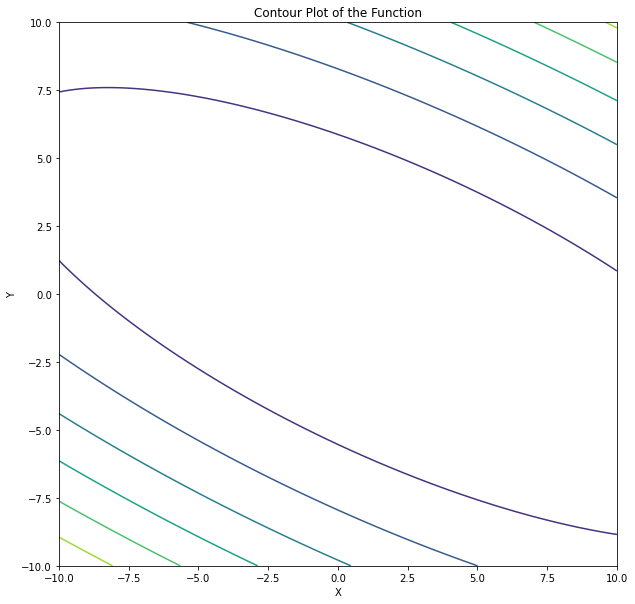

In [29]:
def f(x,y):
    return (5-5*x-2*y+2*x**2+5*x*y+6*y**2)

xlist = np.linspace(-10,10,100)
ylist = np.linspace(-10,10,100)
X, Y = np.meshgrid(xlist, ylist)

Z = f(X,Y)

plt.figure(figsize=(10,10))
plt.contour(X,Y,Z)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of the Function')

# Problem 4
(i) Show that the sequence $x_k=1+(0.5)^{2^k}$ is Q-quadratically convergent to 1.

The definition of Q-quadratic convergence for a sequence is:
\begin{equation}
    \texttt {(5)} \ \lim\limits_{x \to \infty} \frac {|x_{k+1}-\mathcal{L}|}{|x_k-\mathcal{L}|^{p=2}}<M \\ \texttt{for} \ M>0 \ \texttt{where} \ \mathcal{L} \ \texttt{is the number being converged to}
\end{equation}

expanding the equation out we have:

\begin{equation}
    \texttt {(6)} \ \lim\limits_{x \to \infty} \frac {|x_{k+1}-1|}{|x_k^2-2x_k+1|}<M
\end{equation}

Since $\lim\limits_{x \to \infty} x_k = \infty$ it is easy to see that $\texttt {(6)}=1>0$ showing that $x_k$ converges Q-quadratically to 1.


(ii) Does the sequence $x_k = \frac{1}{k!}$ converge Q-superlinearly? Q-quadratically?

For this sequence we will evaluate with Python:

In [32]:
import sympy as sy

g = lambda k: 1/sy.factorial(k)
QCon = lambda func,plusk,q,k: sy.limit(abs(plusk-1)/abs(func-1)**q, k, math.inf)

x = sy.symbols('x')
seq1 = g(x)
seq1p = g(x+1)

print ('Determining Q-superlinear: The limit as x_k goes to infinity is:', QCon(seq1, seq1p, 1, x))
print ('Determining Q-quadratic: The limit as x_k goes to infinity is:', QCon(seq1, seq1p, 2, x))
print ('Determining Q-cubic: The limit as x_k goes to infinity is:', QCon(seq1, seq1p, 3, x))

Determining Q-superlinear: The limit as x_k goes to infinity is: 1
Determining Q-quadratic: The limit as x_k goes to infinity is: 1
Determining Q-cubic: The limit as x_k goes to infinity is: 1
